id : 샘플 별 고유 id

temperature : 기온 (°C)

pressure : 기압 (hPa)

humidity : 습도 (%)

wind_speed : 풍속 (m/s)

wind_direction : 풍향 (degree)

precipitation : 1시간 강수량 (mm)

snowing : 눈 오는 상태 여부 (False, True)

cloudiness : 흐림 정도 (%)

target : 풍력 발전량 (GW) (목표 예측값)
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub  = pd.read_csv('sample_submission.csv')

In [ ]:
train.head()

,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target
0,TRAIN_00000,27.8816,1013.6,46.8,2.4,232.4,0.00,False,0.0,1.180
1,TRAIN_00001,5.7540,1026.6,76.6,3.6,172.0,0.00,False,8.8,8.581
2,TRAIN_00002,20.8220,1016.2,64.8,2.2,206.0,0.06,False,23.0,3.978
3,TRAIN_00003,20.0758,1017.4,72.6,0.8,215.4,0.00,False,0.0,8.301
4,TRAIN_00004,7.5260,1023.2,82.8,1.2,158.0,0.00,False,15.0,1.692


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19275 entries, 0 to 19274
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19275 non-null  object 
 1   temperature     19275 non-null  float64
 2   pressure        19275 non-null  float64
 3   humidity        19275 non-null  float64
 4   wind_speed      19275 non-null  float64
 5   wind_direction  19275 non-null  float64
 6   precipitation   19275 non-null  float64
 7   snowing         19275 non-null  bool   
 8   cloudiness      19275 non-null  float64
 9   target          19275 non-null  float64
dtypes: bool(1), float64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
train.isna().sum()

id                0
temperature       0
pressure          0
humidity          0
wind_speed        0
wind_direction    0
precipitation     0
snowing           0
cloudiness        0
target            0
dtype: int64

In [20]:
train = train.drop(['id'], axis= 1)
test = test.drop(['id'], axis = 1)

In [ ]:
train.describe()

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,cloudiness,target
count,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000
mean,17.288476,1059.825712,68.948763,2.476970,166.578179,0.076572,25.749748,5.477028
std,7.192604,2544.132430,14.856929,1.359942,57.313099,0.193110,17.628612,3.217581
min,-0.208137,812.600000,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.712000,1012.600000,57.800000,1.400000,127.000000,0.000000,12.000000,2.956000
50%,16.530000,1016.800000,70.800000,2.200000,166.600000,0.000000,23.000000,4.837000
75%,22.559000,1021.000000,80.800000,3.200000,208.000000,0.060000,37.000000,7.436500
max,37.058000,201373.000000,100.000000,29.800000,338.000000,3.180000,93.600000,17.344000


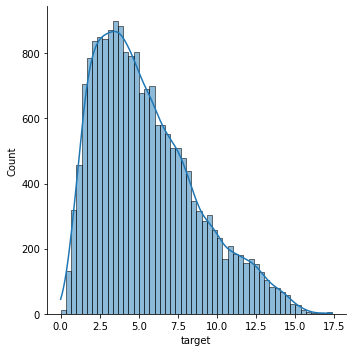

In [ ]:
sns.displot(data = train, x ='target', kde = True)

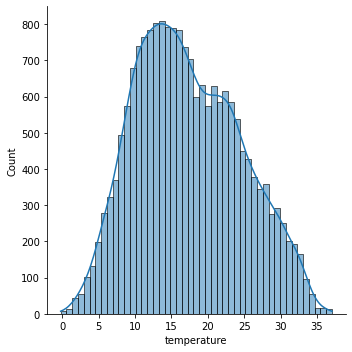

In [ ]:
sns.displot(data = train, x ='temperature', kde = True)

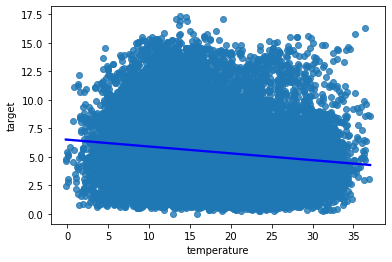

In [ ]:
sns.regplot(x = 'temperature', y= 'target',data = train, line_kws = {'color':'blue'})

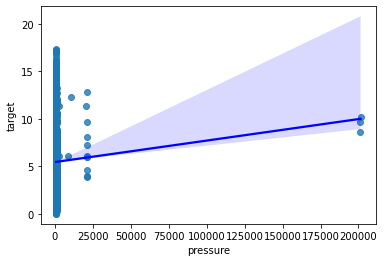

In [ ]:
sns.regplot(x = 'pressure', y = 'target', data = train, line_kws = {'color': 'blue'})

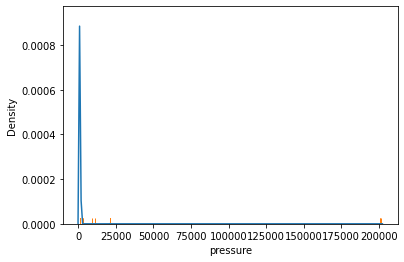

In [ ]:
sns.kdeplot(x = 'pressure', data = train)
sns.rugplot(x = 'pressure', data = train)

In [29]:
train[train['pressure']>=150000]
index_pre = train[train['pressure']>=150000].index

In [30]:
train = train.drop(index = index_pre, axis = 0)

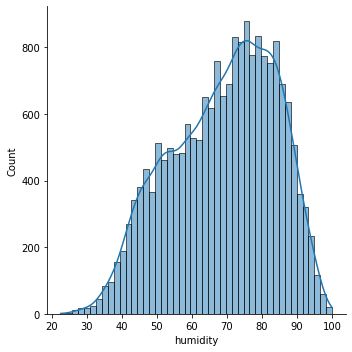

In [ ]:
sns.displot(x = 'humidity', data = train, kde = True)

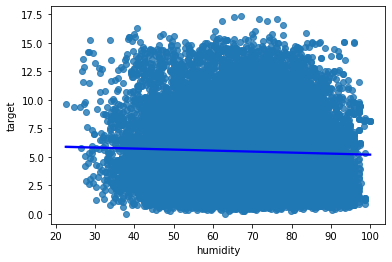

In [ ]:
sns.regplot(x = 'humidity', y = 'target', data = train, line_kws = {'color': 'blue'})

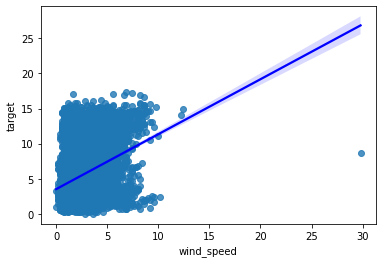

In [ ]:
sns.regplot(x='wind_speed', y= 'target',data= train, line_kws = {'color' : 'blue'})

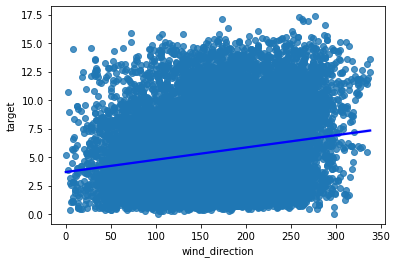

In [ ]:
sns.regplot(x= 'wind_direction', y = 'target', data =train, line_kws = {'color' : 'blue'})

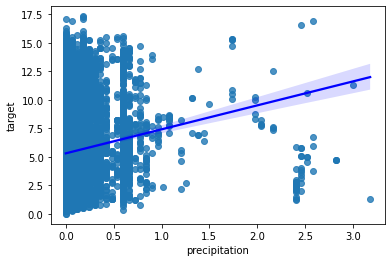

In [ ]:
sns.regplot(x= 'precipitation', y = 'target', data = train, line_kws = {'color' : 'blue'})

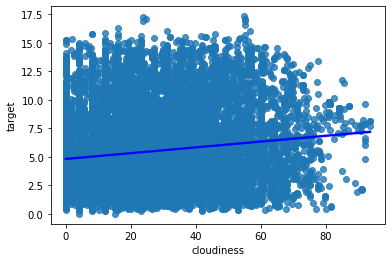

In [ ]:
sns.regplot(x = 'cloudiness', y= 'target', data = train, line_kws = {'color': 'blue'})

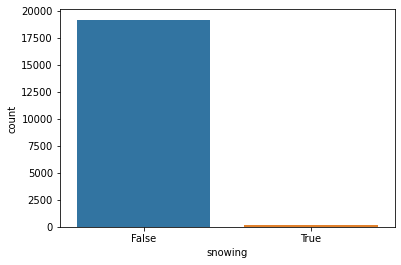

In [ ]:
sns.countplot(x= 'snowing', data = train)

In [ ]:
train.snowing.value_counts()

False    19147
True       125
Name: snowing, dtype: int64

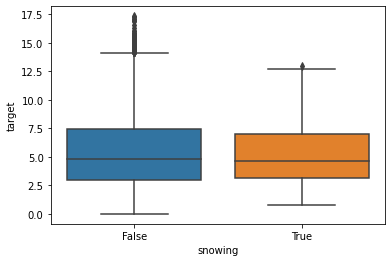

In [ ]:
sns.boxplot(x= 'snowing', y = 'target', data = train)

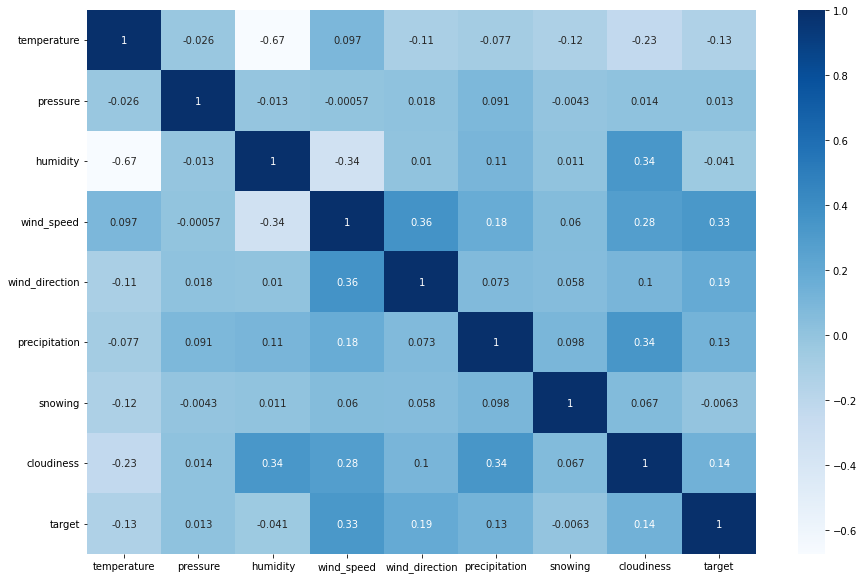

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(train.corr(), cmap = 'Blues', annot = True)

In [4]:
from xgboost import XGBRegressor

In [5]:
from lightgbm import LGBMRegressor

In [13]:
from sklearn.metrics import mean_absolute_error

In [11]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size= 0.2)

In [6]:
from sklearn.ensemble import VotingRegressor

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
X = train.drop(['target'], axis =1)
y = train['target']

In [44]:
xgb = XGBRegressor()

In [38]:
lgb = LGBMRegressor()

In [15]:
rf_clf = RandomForestRegressor()

In [ ]:
!pip install optuna
import optuna

In [ ]:
def objective(trial):
    params = {
        'objective': 'regression',
        'random_seed': 1234,
        'learning_rate':0.05,
        'num_leave': trial.suggest_int('num_leaves', 4,64),
        'max_bin': trial.suggest_int('max_bin', 50,200),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
        'bagging_freq':trial.suggest_int('bagging_freq',1,10),
        'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),
        'min_data_in_leaf':trial.suggest_int('min_data_in_leaf',2,16),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',2,16)
    }
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)
    
    model_lgb = lgb.train(params, lgb_train, valid_sets = lgb_eval, num_boost_round = 100, early_stopping_rounds = 20, verbose_eval = 10)
    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)
    score = np.sqrt(mean_absolute_error(y_valid, y_pred))
    return score

study = optuna.create_study(sampler = optuna.samplers.RandomSampler(seed= 0))
study.optimize(objective, n_trials = 50)
study.best_params

[I 2023-02-14 12:05:53,736] A new study created in memory with name: no-name-f1511b1d-1d28-4030-aa57-dd56a51fc139
<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.54419
[20]	valid_0's l2: 9.04938
[30]	valid_0's l2: 8.79835
[40]	valid_0's l2: 8.61207
[50]	valid_0's l2: 8.49712
[60]	valid_0's l2: 8.4156
[70]	valid_0's l2: 8.34677


[I 2023-02-14 12:05:54,108] Trial 0 finished with value: 1.5117790411569028 and parameters: {'num_leaves': 37, 'max_bin': 157, 'bagging_fraction': 0.7013816880358219, 'bagging_freq': 6, 'feture_fraction': 0.6118273996694523, 'min_data_in_leaf': 11}. Best is trial 0 with value: 1.5117790411569028.


[80]	valid_0's l2: 8.2901
[90]	valid_0's l2: 8.25608
[100]	valid_0's l2: 8.21701
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 8.21701
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.42792
[20]	valid_0's l2: 8.86524


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


[30]	valid_0's l2: 8.56108
[40]	valid_0's l2: 8.39887
[50]	valid_0's l2: 8.29841
[60]	valid_0's l2: 8.19833
[70]	valid_0's l2: 8.14369
[80]	valid_0's l2: 8.08831
[90]	valid_0's l2: 8.05377


[I 2023-02-14 12:05:54,492] Trial 1 finished with value: 1.5017770569298272 and parameters: {'num_leaves': 30, 'max_bin': 184, 'bagging_fraction': 0.8818313802505147, 'bagging_freq': 4, 'feture_fraction': 0.7958625190413323, 'min_data_in_leaf': 9}. Best is trial 1 with value: 1.5017770569298272.


[100]	valid_0's l2: 8.02614
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.02614
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.69767
[20]	valid_0's l2: 9.23793
[30]	valid_0's l2: 8.95588
[40]	valid_0's l2: 8.75883


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),
[I 2023-02-14 12:05:54,832] Trial 2 finished with value: 1.5187268182651268 and parameters: {'num_leaves': 38, 'max_bin': 189, 'bagging_fraction': 0.4355180290989435, 'bagging_freq': 1, 'feture_fraction': 0.4101091987201629, 'min_data_in_leaf': 14}. Best is trial 1 with value: 1.5017770569298272.


[50]	valid_0's l2: 8.61135
[60]	valid_0's l2: 8.53319
[70]	valid_0's l2: 8.46211
[80]	valid_0's l2: 8.4033
[90]	valid_0's l2: 8.35381
[100]	valid_0's l2: 8.3295
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.3295


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.51225
[20]	valid_0's l2: 8.93222
[30]	valid_0's l2: 8.61432
[40]	valid_0's l2: 8.44104
[50]	valid_0's l2: 8.32766
[60]	valid_0's l2: 8.24625
[70]	valid_0's l2: 8.16987


[I 2023-02-14 12:05:55,205] Trial 3 finished with value: 1.5033412058291322 and parameters: {'num_leaves': 51, 'max_bin': 181, 'bagging_fraction': 0.8893091711163821, 'bagging_freq': 8, 'feture_fraction': 0.630739681126466, 'min_data_in_leaf': 13}. Best is trial 1 with value: 1.5017770569298272.


[80]	valid_0's l2: 8.13259
[90]	valid_0's l2: 8.0785
[100]	valid_0's l2: 8.04932
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.04932
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.50894
[20]	valid_0's l2: 8.96883


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),
[I 2023-02-14 12:05:55,512] Trial 4 finished with value: 1.5040081145705952 and parameters: {'num_leaves': 11, 'max_bin': 146, 'bagging_fraction': 0.4716766437045232, 'bagging_freq': 10, 'feture_fraction': 0.6609241608750358, 'min_data_in_leaf': 8}. Best is trial 1 with value: 1.5017770569298272.


[30]	valid_0's l2: 8.67985
[40]	valid_0's l2: 8.49049
[50]	valid_0's l2: 8.35424
[60]	valid_0's l2: 8.27072
[70]	valid_0's l2: 8.21064
[80]	valid_0's l2: 8.17617
[90]	valid_0's l2: 8.11989
[100]	valid_0's l2: 8.09747
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.09747


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.65557
[20]	valid_0's l2: 9.17161
[30]	valid_0's l2: 8.8983
[40]	valid_0's l2: 8.71602
[50]	valid_0's l2: 8.56213
[60]	valid_0's l2: 8.46049
[70]	valid_0's l2: 8.38814


[I 2023-02-14 12:05:55,858] Trial 5 finished with value: 1.5149143983261246 and parameters: {'num_leaves': 20, 'max_bin': 166, 'bagging_fraction': 0.6280751661082743, 'bagging_freq': 6, 'feture_fraction': 0.4093949002181776, 'min_data_in_leaf': 11}. Best is trial 1 with value: 1.5017770569298272.


[80]	valid_0's l2: 8.33096
[90]	valid_0's l2: 8.28613
[100]	valid_0's l2: 8.25662
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.25662
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.55654
[20]	valid_0's l2: 9.06192


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


[30]	valid_0's l2: 8.76633
[40]	valid_0's l2: 8.60297
[50]	valid_0's l2: 8.49391
[60]	valid_0's l2: 8.40327
[70]	valid_0's l2: 8.33548
[80]	valid_0's l2: 8.28065
[90]	valid_0's l2: 8.23245
[100]	valid_0's l2: 8.19248
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 8.19242


[I 2023-02-14 12:05:56,227] Trial 6 finished with value: 1.5110368711156525 and parameters: {'num_leaves': 41, 'max_bin': 143, 'bagging_fraction': 0.8718740392573121, 'bagging_freq': 7, 'feture_fraction': 0.579753950286893, 'min_data_in_leaf': 8}. Best is trial 1 with value: 1.5017770569298272.
<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.56207
[20]	valid_0's l2: 9.05281
[30]	valid_0's l2: 8.78619
[40]	valid_0's l2: 8.63507
[50]	valid_0's l2: 8.51471
[60]	valid_0's l2: 8.4304
[70]	valid_0's l2: 8.36104
[80]	valid_0's l2: 8.30237
[90]	valid_0's l2: 8.2598


[I 2023-02-14 12:05:56,544] Trial 7 finished with value: 1.5118590228281203 and parameters: {'num_leaves': 46, 'max_bin': 59, 'bagging_fraction': 0.7333833577228339, 'bagging_freq': 7, 'feture_fraction': 0.5051912805369205, 'min_data_in_leaf': 3}. Best is trial 1 with value: 1.5017770569298272.


[100]	valid_0's l2: 8.21931
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.21931
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.35745
[20]	valid_0's l2: 8.8305
[30]	valid_0's l2: 8.56417


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),
[I 2023-02-14 12:05:56,891] Trial 8 finished with value: 1.5018254508301712 and parameters: {'num_leaves': 23, 'max_bin': 104, 'bagging_fraction': 0.6850983852089398, 'bagging_freq': 5, 'feture_fraction': 0.8941869190296131, 'min_data_in_leaf': 3}. Best is trial 1 with value: 1.5017770569298272.


[40]	valid_0's l2: 8.4076
[50]	valid_0's l2: 8.29695
[60]	valid_0's l2: 8.21829
[70]	valid_0's l2: 8.17037
[80]	valid_0's l2: 8.12199
[90]	valid_0's l2: 8.06161
[100]	valid_0's l2: 8.04661
Did not meet early stopping. Best iteration is:
[97]	valid_0's l2: 8.04417


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.51845
[20]	valid_0's l2: 8.92432
[30]	valid_0's l2: 8.61189
[40]	valid_0's l2: 8.43749
[50]	valid_0's l2: 8.32553
[60]	valid_0's l2: 8.2516
[70]	valid_0's l2: 8.20326


[I 2023-02-14 12:05:57,240] Trial 9 finished with value: 1.5051263327746085 and parameters: {'num_leaves': 16, 'max_bin': 74, 'bagging_fraction': 0.7265541627326992, 'bagging_freq': 3, 'feture_fraction': 0.6331553864281532, 'min_data_in_leaf': 5}. Best is trial 1 with value: 1.5017770569298272.


[80]	valid_0's l2: 8.15244
[90]	valid_0's l2: 8.10974
[100]	valid_0's l2: 8.07088
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.07088
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.6701
[20]	valid_0's l2: 9.19887


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


[30]	valid_0's l2: 8.93602
[40]	valid_0's l2: 8.73883
[50]	valid_0's l2: 8.61047
[60]	valid_0's l2: 8.50883
[70]	valid_0's l2: 8.44368
[80]	valid_0's l2: 8.38785
[90]	valid_0's l2: 8.33539
[100]	valid_0's l2: 8.28878
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.28878


[I 2023-02-14 12:05:57,566] Trial 10 finished with value: 1.5168956386594172 and parameters: {'num_leaves': 13, 'max_bin': 66, 'bagging_fraction': 0.7281647947326367, 'bagging_freq': 2, 'feture_fraction': 0.49829118084002677, 'min_data_in_leaf': 7}. Best is trial 1 with value: 1.5017770569298272.
<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.36489
[20]	valid_0's l2: 8.8379
[30]	valid_0's l2: 8.57791
[40]	valid_0's l2: 8.42441
[50]	valid_0's l2: 8.3166
[60]	valid_0's l2: 8.21917
[70]	valid_0's l2: 8.14
[80]	valid_0's l2: 8.09895


[I 2023-02-14 12:05:57,880] Trial 11 finished with value: 1.4999129891903473 and parameters: {'num_leaves': 54, 'max_bin': 64, 'bagging_fraction': 0.818972453749402, 'bagging_freq': 1, 'feture_fraction': 0.8882297325066979, 'min_data_in_leaf': 9}. Best is trial 11 with value: 1.4999129891903473.


[90]	valid_0's l2: 8.06259
[100]	valid_0's l2: 8.01669
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.01669
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.56048
[20]	valid_0's l2: 9.04981
[30]	valid_0's l2: 8.77303
[40]	valid_0's l2: 8.59992


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),
[I 2023-02-14 12:05:58,235] Trial 12 finished with value: 1.5117063487674534 and parameters: {'num_leaves': 63, 'max_bin': 141, 'bagging_fraction': 0.7696317896991509, 'bagging_freq': 1, 'feture_fraction': 0.5414034812882048, 'min_data_in_leaf': 3}. Best is trial 11 with value: 1.4999129891903473.


[50]	valid_0's l2: 8.48859
[60]	valid_0's l2: 8.40937
[70]	valid_0's l2: 8.3523
[80]	valid_0's l2: 8.29958
[90]	valid_0's l2: 8.24612
[100]	valid_0's l2: 8.22478
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 8.22245


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.6487
[20]	valid_0's l2: 9.15948
[30]	valid_0's l2: 8.89939
[40]	valid_0's l2: 8.70995
[50]	valid_0's l2: 8.57342
[60]	valid_0's l2: 8.47726


[I 2023-02-14 12:05:58,705] Trial 13 finished with value: 1.5170394547746198 and parameters: {'num_leaves': 22, 'max_bin': 67, 'bagging_fraction': 0.558991589696988, 'bagging_freq': 5, 'feture_fraction': 0.4320737481743922, 'min_data_in_leaf': 12}. Best is trial 11 with value: 1.4999129891903473.


[70]	valid_0's l2: 8.42628
[80]	valid_0's l2: 8.37397
[90]	valid_0's l2: 8.33154
[100]	valid_0's l2: 8.29243
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.29243


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.51192
[20]	valid_0's l2: 8.93524
[30]	valid_0's l2: 8.64108
[40]	valid_0's l2: 8.4519
[50]	valid_0's l2: 8.34223
[60]	valid_0's l2: 8.26255


[I 2023-02-14 12:05:59,152] Trial 14 finished with value: 1.5031884767444093 and parameters: {'num_leaves': 38, 'max_bin': 90, 'bagging_fraction': 0.6616240267333499, 'bagging_freq': 1, 'feture_fraction': 0.6879732477780897, 'min_data_in_leaf': 15}. Best is trial 11 with value: 1.4999129891903473.


[70]	valid_0's l2: 8.20154
[80]	valid_0's l2: 8.15601
[90]	valid_0's l2: 8.10807
[100]	valid_0's l2: 8.06795
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 8.06778
Training until validation scores don't improve for 20 rounds.


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


[10]	valid_0's l2: 9.56199
[20]	valid_0's l2: 9.07555
[30]	valid_0's l2: 8.79966
[40]	valid_0's l2: 8.64016
[50]	valid_0's l2: 8.52957
[60]	valid_0's l2: 8.44856
[70]	valid_0's l2: 8.39883
[80]	valid_0's l2: 8.3431
[90]	valid_0's l2: 8.28633
[100]	valid_0's l2: 8.26378
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 8.26286


[I 2023-02-14 12:05:59,461] Trial 15 finished with value: 1.5144422324316618 and parameters: {'num_leaves': 23, 'max_bin': 150, 'bagging_fraction': 0.4658989312021961, 'bagging_freq': 8, 'feture_fraction': 0.5447030464736006, 'min_data_in_leaf': 4}. Best is trial 11 with value: 1.4999129891903473.
<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.50192
[20]	valid_0's l2: 8.93578
[30]	valid_0's l2: 8.63893
[40]	valid_0's l2: 8.46747
[50]	valid_0's l2: 8.35759
[60]	valid_0's l2: 8.27311
[70]	valid_0's l2: 8.19888
[80]	valid_0's l2: 8.13765
[90]	valid_0's l2: 8.09631
[100]	valid_0's l2: 8.05981
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.05981


[I 2023-02-14 12:05:59,746] Trial 16 finished with value: 1.5026612692084989 and parameters: {'num_leaves': 39, 'max_bin': 53, 'bagging_fraction': 0.8144700146086816, 'bagging_freq': 1, 'feture_fraction': 0.7389082683981151, 'min_data_in_leaf': 6}. Best is trial 11 with value: 1.4999129891903473.
<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.49187
[20]	valid_0's l2: 8.9148
[30]	valid_0's l2: 8.60904
[40]	valid_0's l2: 8.43164
[50]	valid_0's l2: 8.30581
[60]	valid_0's l2: 8.23595
[70]	valid_0's l2: 8.17152


[I 2023-02-14 12:06:00,097] Trial 17 finished with value: 1.5014485933250976 and parameters: {'num_leaves': 48, 'max_bin': 195, 'bagging_fraction': 0.5243765717599791, 'bagging_freq': 6, 'feture_fraction': 0.6960209656359195, 'min_data_in_leaf': 10}. Best is trial 11 with value: 1.4999129891903473.


[80]	valid_0's l2: 8.12987
[90]	valid_0's l2: 8.09194
[100]	valid_0's l2: 8.05143
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.05143
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.50527
[20]	valid_0's l2: 8.92596


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


[30]	valid_0's l2: 8.60631
[40]	valid_0's l2: 8.43194
[50]	valid_0's l2: 8.32386
[60]	valid_0's l2: 8.24425
[70]	valid_0's l2: 8.17295
[80]	valid_0's l2: 8.12117
[90]	valid_0's l2: 8.09524
[100]	valid_0's l2: 8.05246
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.05246


[I 2023-02-14 12:06:00,430] Trial 18 finished with value: 1.503725910513389 and parameters: {'num_leaves': 17, 'max_bin': 193, 'bagging_fraction': 0.6235626893088138, 'bagging_freq': 9, 'feture_fraction': 0.7497396376587522, 'min_data_in_leaf': 6}. Best is trial 11 with value: 1.4999129891903473.
<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.43685
[20]	valid_0's l2: 8.8703
[30]	valid_0's l2: 8.5723
[40]	valid_0's l2: 8.41488
[50]	valid_0's l2: 8.3067
[60]	valid_0's l2: 8.22014
[70]	valid_0's l2: 8.17196


[I 2023-02-14 12:06:00,784] Trial 19 finished with value: 1.5026546735667703 and parameters: {'num_leaves': 53, 'max_bin': 109, 'bagging_fraction': 0.8405515985555808, 'bagging_freq': 6, 'feture_fraction': 0.8408676809274265, 'min_data_in_leaf': 12}. Best is trial 11 with value: 1.4999129891903473.


[80]	valid_0's l2: 8.12753
[90]	valid_0's l2: 8.0926
[100]	valid_0's l2: 8.0582
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.0582
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.54961
[20]	valid_0's l2: 9.05327


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


[30]	valid_0's l2: 8.76797
[40]	valid_0's l2: 8.61523
[50]	valid_0's l2: 8.49778
[60]	valid_0's l2: 8.41
[70]	valid_0's l2: 8.34179
[80]	valid_0's l2: 8.2958
[90]	valid_0's l2: 8.2584
[100]	valid_0's l2: 8.22237
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.22237


[I 2023-02-14 12:06:01,134] Trial 20 finished with value: 1.5123367718211813 and parameters: {'num_leaves': 48, 'max_bin': 125, 'bagging_fraction': 0.878041817361612, 'bagging_freq': 7, 'feture_fraction': 0.6119275242790898, 'min_data_in_leaf': 11}. Best is trial 11 with value: 1.4999129891903473.
<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.47961
[20]	valid_0's l2: 8.88567
[30]	valid_0's l2: 8.58378
[40]	valid_0's l2: 8.39434
[50]	valid_0's l2: 8.28257
[60]	valid_0's l2: 8.20762
[70]	valid_0's l2: 8.14816
[80]	valid_0's l2: 8.10274


[I 2023-02-14 12:06:01,467] Trial 21 finished with value: 1.5029476757830107 and parameters: {'num_leaves': 5, 'max_bin': 95, 'bagging_fraction': 0.7300867687463426, 'bagging_freq': 3, 'feture_fraction': 0.7090077144994208, 'min_data_in_leaf': 8}. Best is trial 11 with value: 1.4999129891903473.


[90]	valid_0's l2: 8.06192
[100]	valid_0's l2: 8.0232
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.0232
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.50143
[20]	valid_0's l2: 8.93228
[30]	valid_0's l2: 8.63965


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),
[I 2023-02-14 12:06:01,795] Trial 22 finished with value: 1.5037588659420205 and parameters: {'num_leaves': 12, 'max_bin': 95, 'bagging_fraction': 0.6849824553506325, 'bagging_freq': 6, 'feture_fraction': 0.6871626244247895, 'min_data_in_leaf': 11}. Best is trial 11 with value: 1.4999129891903473.


[40]	valid_0's l2: 8.45774
[50]	valid_0's l2: 8.34303
[60]	valid_0's l2: 8.26138
[70]	valid_0's l2: 8.19836
[80]	valid_0's l2: 8.14059
[90]	valid_0's l2: 8.10145
[100]	valid_0's l2: 8.07827
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.07827


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.55777
[20]	valid_0's l2: 9.05714
[30]	valid_0's l2: 8.78675
[40]	valid_0's l2: 8.63049
[50]	valid_0's l2: 8.51285
[60]	valid_0's l2: 8.4235
[70]	valid_0's l2: 8.35387


[I 2023-02-14 12:06:02,150] Trial 23 finished with value: 1.5118729685232282 and parameters: {'num_leaves': 43, 'max_bin': 115, 'bagging_fraction': 0.8482732979255315, 'bagging_freq': 4, 'feture_fraction': 0.6179324626328134, 'min_data_in_leaf': 15}. Best is trial 11 with value: 1.4999129891903473.


[80]	valid_0's l2: 8.30612
[90]	valid_0's l2: 8.26125
[100]	valid_0's l2: 8.22931
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.22931
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.44158
[20]	valid_0's l2: 8.88978


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


[30]	valid_0's l2: 8.61645
[40]	valid_0's l2: 8.44921
[50]	valid_0's l2: 8.31287
[60]	valid_0's l2: 8.23408
[70]	valid_0's l2: 8.18497
[80]	valid_0's l2: 8.14013
[90]	valid_0's l2: 8.08903
[100]	valid_0's l2: 8.08267
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 8.08056


[I 2023-02-14 12:06:02,478] Trial 24 finished with value: 1.5023349585345875 and parameters: {'num_leaves': 53, 'max_bin': 156, 'bagging_fraction': 0.4501134436561506, 'bagging_freq': 10, 'feture_fraction': 0.7571206497745557, 'min_data_in_leaf': 16}. Best is trial 11 with value: 1.4999129891903473.
<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.66393
[20]	valid_0's l2: 9.21587
[30]	valid_0's l2: 8.93802
[40]	valid_0's l2: 8.73028
[50]	valid_0's l2: 8.58812
[60]	valid_0's l2: 8.4994
[70]	valid_0's l2: 8.43722
[80]	valid_0's l2: 8.39612
[90]	valid_0's l2: 8.34095


[I 2023-02-14 12:06:02,792] Trial 25 finished with value: 1.5165871830300774 and parameters: {'num_leaves': 13, 'max_bin': 181, 'bagging_fraction': 0.48124646733818743, 'bagging_freq': 7, 'feture_fraction': 0.4619099914247208, 'min_data_in_leaf': 14}. Best is trial 11 with value: 1.4999129891903473.


[100]	valid_0's l2: 8.29392
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.29392
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.51131
[20]	valid_0's l2: 8.94418
[30]	valid_0's l2: 8.65836
[40]	valid_0's l2: 8.48583


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),
[I 2023-02-14 12:06:03,099] Trial 26 finished with value: 1.5029966480319839 and parameters: {'num_leaves': 53, 'max_bin': 135, 'bagging_fraction': 0.6035916486129999, 'bagging_freq': 1, 'feture_fraction': 0.7487143865722818, 'min_data_in_leaf': 8}. Best is trial 11 with value: 1.4999129891903473.


[50]	valid_0's l2: 8.3772
[60]	valid_0's l2: 8.28101
[70]	valid_0's l2: 8.21251
[80]	valid_0's l2: 8.17088
[90]	valid_0's l2: 8.107
[100]	valid_0's l2: 8.07062
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.07062
Training until validation scores don't improve for 20 rounds.


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


[10]	valid_0's l2: 9.65531
[20]	valid_0's l2: 9.17228
[30]	valid_0's l2: 8.89791
[40]	valid_0's l2: 8.71433
[50]	valid_0's l2: 8.56631
[60]	valid_0's l2: 8.46929
[70]	valid_0's l2: 8.40168
[80]	valid_0's l2: 8.3551
[90]	valid_0's l2: 8.30557


[I 2023-02-14 12:06:03,439] Trial 27 finished with value: 1.5162071443615253 and parameters: {'num_leaves': 48, 'max_bin': 180, 'bagging_fraction': 0.8877607525014429, 'bagging_freq': 9, 'feture_fraction': 0.405857042092501, 'min_data_in_leaf': 7}. Best is trial 11 with value: 1.4999129891903473.


[100]	valid_0's l2: 8.26317
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.26317
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.67529
[20]	valid_0's l2: 9.20317
[30]	valid_0's l2: 8.93715
[40]	valid_0's l2: 8.74064
[50]	valid_0's l2: 8.60228
[60]	valid_0's l2: 8.50622


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),
[I 2023-02-14 12:06:03,707] Trial 28 finished with value: 1.5175343192591353 and parameters: {'num_leaves': 48, 'max_bin': 75, 'bagging_fraction': 0.6605183031020647, 'bagging_freq': 1, 'feture_fraction': 0.49999826244820006, 'min_data_in_leaf': 2}. Best is trial 11 with value: 1.4999129891903473.


[70]	valid_0's l2: 8.43385
[80]	valid_0's l2: 8.37505
[90]	valid_0's l2: 8.32442
[100]	valid_0's l2: 8.28583
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.28583
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.42398
[20]	valid_0's l2: 8.84739


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


[30]	valid_0's l2: 8.58216
[40]	valid_0's l2: 8.42366
[50]	valid_0's l2: 8.3136
[60]	valid_0's l2: 8.23808
[70]	valid_0's l2: 8.18525
[80]	valid_0's l2: 8.12924
[90]	valid_0's l2: 8.09325
[100]	valid_0's l2: 8.06947
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 8.06898


[I 2023-02-14 12:06:04,090] Trial 29 finished with value: 1.5038200453796022 and parameters: {'num_leaves': 52, 'max_bin': 83, 'bagging_fraction': 0.5726758403484513, 'bagging_freq': 10, 'feture_fraction': 0.7522072009617664, 'min_data_in_leaf': 2}. Best is trial 11 with value: 1.4999129891903473.
<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.42936
[20]	valid_0's l2: 8.86427
[30]	valid_0's l2: 8.55957
[40]	valid_0's l2: 8.38538
[50]	valid_0's l2: 8.2776


[I 2023-02-14 12:06:04,570] Trial 30 finished with value: 1.5005723623586575 and parameters: {'num_leaves': 14, 'max_bin': 143, 'bagging_fraction': 0.6886142943020839, 'bagging_freq': 3, 'feture_fraction': 0.867106998962397, 'min_data_in_leaf': 11}. Best is trial 11 with value: 1.4999129891903473.


[60]	valid_0's l2: 8.20635
[70]	valid_0's l2: 8.14351
[80]	valid_0's l2: 8.09833
[90]	valid_0's l2: 8.06469
[100]	valid_0's l2: 8.03314
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.03314


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.54735
[20]	valid_0's l2: 9.05431
[30]	valid_0's l2: 8.79167
[40]	valid_0's l2: 8.6229
[50]	valid_0's l2: 8.50083
[60]	valid_0's l2: 8.41748


[I 2023-02-14 12:06:05,042] Trial 31 finished with value: 1.5120907518881608 and parameters: {'num_leaves': 36, 'max_bin': 139, 'bagging_fraction': 0.7650610147583848, 'bagging_freq': 4, 'feture_fraction': 0.599110531108046, 'min_data_in_leaf': 5}. Best is trial 11 with value: 1.4999129891903473.


[70]	valid_0's l2: 8.35603
[80]	valid_0's l2: 8.30834
[90]	valid_0's l2: 8.26057
[100]	valid_0's l2: 8.22893
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.22893


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.5508
[20]	valid_0's l2: 9.04939
[30]	valid_0's l2: 8.7794
[40]	valid_0's l2: 8.60726
[50]	valid_0's l2: 8.47192


[I 2023-02-14 12:06:05,492] Trial 32 finished with value: 1.5111524664634581 and parameters: {'num_leaves': 15, 'max_bin': 192, 'bagging_fraction': 0.7697753975246437, 'bagging_freq': 5, 'feture_fraction': 0.5137073139866617, 'min_data_in_leaf': 5}. Best is trial 11 with value: 1.4999129891903473.


[60]	valid_0's l2: 8.3813
[70]	valid_0's l2: 8.3107
[80]	valid_0's l2: 8.27404
[90]	valid_0's l2: 8.21519
[100]	valid_0's l2: 8.16867
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.16867


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.56673
[20]	valid_0's l2: 9.07725
[30]	valid_0's l2: 8.82235
[40]	valid_0's l2: 8.63986
[50]	valid_0's l2: 8.5116
[60]	valid_0's l2: 8.43357


[I 2023-02-14 12:06:05,932] Trial 33 finished with value: 1.5096971263277246 and parameters: {'num_leaves': 7, 'max_bin': 115, 'bagging_fraction': 0.5558979409970513, 'bagging_freq': 7, 'feture_fraction': 0.5888759196462405, 'min_data_in_leaf': 4}. Best is trial 11 with value: 1.4999129891903473.


[70]	valid_0's l2: 8.36605
[80]	valid_0's l2: 8.30715
[90]	valid_0's l2: 8.24672
[100]	valid_0's l2: 8.20706
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.20706


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.50222
[20]	valid_0's l2: 8.93006
[30]	valid_0's l2: 8.65174
[40]	valid_0's l2: 8.48707
[50]	valid_0's l2: 8.36874


[I 2023-02-14 12:06:06,375] Trial 34 finished with value: 1.503338623839128 and parameters: {'num_leaves': 5, 'max_bin': 60, 'bagging_fraction': 0.7396963867492836, 'bagging_freq': 5, 'feture_fraction': 0.6682896055543611, 'min_data_in_leaf': 15}. Best is trial 11 with value: 1.4999129891903473.


[60]	valid_0's l2: 8.27556
[70]	valid_0's l2: 8.22731
[80]	valid_0's l2: 8.1833
[90]	valid_0's l2: 8.13162
[100]	valid_0's l2: 8.09597
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.09597


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.66262
[20]	valid_0's l2: 9.16673
[30]	valid_0's l2: 8.89175
[40]	valid_0's l2: 8.69928
[50]	valid_0's l2: 8.57323
[60]	valid_0's l2: 8.47299


[I 2023-02-14 12:06:06,805] Trial 35 finished with value: 1.5158698603937673 and parameters: {'num_leaves': 64, 'max_bin': 82, 'bagging_fraction': 0.7315391015500504, 'bagging_freq': 3, 'feture_fraction': 0.41032549973286436, 'min_data_in_leaf': 13}. Best is trial 11 with value: 1.4999129891903473.


[70]	valid_0's l2: 8.39719
[80]	valid_0's l2: 8.34291
[90]	valid_0's l2: 8.28819
[100]	valid_0's l2: 8.25246
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.25246


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.50593
[20]	valid_0's l2: 8.9288
[30]	valid_0's l2: 8.62109
[40]	valid_0's l2: 8.43423
[50]	valid_0's l2: 8.33213
[60]	valid_0's l2: 8.25514


[I 2023-02-14 12:06:07,260] Trial 36 finished with value: 1.5032048510731777 and parameters: {'num_leaves': 23, 'max_bin': 107, 'bagging_fraction': 0.6941585567768029, 'bagging_freq': 9, 'feture_fraction': 0.7144909217955744, 'min_data_in_leaf': 15}. Best is trial 11 with value: 1.4999129891903473.


[70]	valid_0's l2: 8.18279
[80]	valid_0's l2: 8.13638
[90]	valid_0's l2: 8.10614
[100]	valid_0's l2: 8.06519
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.06519


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.49805
[20]	valid_0's l2: 8.93288
[30]	valid_0's l2: 8.66089
[40]	valid_0's l2: 8.47961
[50]	valid_0's l2: 8.33864
[60]	valid_0's l2: 8.24806


[I 2023-02-14 12:06:07,721] Trial 37 finished with value: 1.504116183670508 and parameters: {'num_leaves': 20, 'max_bin': 170, 'bagging_fraction': 0.4928179721529761, 'bagging_freq': 10, 'feture_fraction': 0.7437441381939076, 'min_data_in_leaf': 5}. Best is trial 11 with value: 1.4999129891903473.


[70]	valid_0's l2: 8.21027
[80]	valid_0's l2: 8.17478
[90]	valid_0's l2: 8.12718
[100]	valid_0's l2: 8.10208
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.10208


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.51101
[20]	valid_0's l2: 8.92951
[30]	valid_0's l2: 8.62351
[40]	valid_0's l2: 8.44578
[50]	valid_0's l2: 8.33876


[I 2023-02-14 12:06:08,183] Trial 38 finished with value: 1.5055616196225012 and parameters: {'num_leaves': 61, 'max_bin': 160, 'bagging_fraction': 0.5269708212975129, 'bagging_freq': 3, 'feture_fraction': 0.6591003569653316, 'min_data_in_leaf': 2}. Best is trial 11 with value: 1.4999129891903473.


[60]	valid_0's l2: 8.26439
[70]	valid_0's l2: 8.20717
[80]	valid_0's l2: 8.15681
[90]	valid_0's l2: 8.11525
[100]	valid_0's l2: 8.08503
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.08503


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.5645
[20]	valid_0's l2: 9.05533
[30]	valid_0's l2: 8.77774
[40]	valid_0's l2: 8.6107
[50]	valid_0's l2: 8.49172
[60]	valid_0's l2: 8.40676


[I 2023-02-14 12:06:08,623] Trial 39 finished with value: 1.512562963272005 and parameters: {'num_leaves': 16, 'max_bin': 114, 'bagging_fraction': 0.5870849901671128, 'bagging_freq': 5, 'feture_fraction': 0.5388143531473659, 'min_data_in_leaf': 10}. Best is trial 11 with value: 1.4999129891903473.


[70]	valid_0's l2: 8.34101
[80]	valid_0's l2: 8.29837
[90]	valid_0's l2: 8.27069
[100]	valid_0's l2: 8.23725
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 8.2347


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.45631
[20]	valid_0's l2: 8.88242
[30]	valid_0's l2: 8.59819
[40]	valid_0's l2: 8.4537
[50]	valid_0's l2: 8.34807
[60]	valid_0's l2: 8.27514
[70]	valid_0's l2: 8.2083


[I 2023-02-14 12:06:09,002] Trial 40 finished with value: 1.502419398750575 and parameters: {'num_leaves': 56, 'max_bin': 67, 'bagging_fraction': 0.6586895535770572, 'bagging_freq': 2, 'feture_fraction': 0.7584298405962968, 'min_data_in_leaf': 7}. Best is trial 11 with value: 1.4999129891903473.


[80]	valid_0's l2: 8.15814
[90]	valid_0's l2: 8.1155
[100]	valid_0's l2: 8.08044
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 8.07877
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.5537
[20]	valid_0's l2: 9.05466


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


[30]	valid_0's l2: 8.80912
[40]	valid_0's l2: 8.64561
[50]	valid_0's l2: 8.54234
[60]	valid_0's l2: 8.47151
[70]	valid_0's l2: 8.42384
[80]	valid_0's l2: 8.38447
[90]	valid_0's l2: 8.3452
[100]	valid_0's l2: 8.29664
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.29664


[I 2023-02-14 12:06:09,327] Trial 41 finished with value: 1.515605927045465 and parameters: {'num_leaves': 38, 'max_bin': 77, 'bagging_fraction': 0.47242387967168864, 'bagging_freq': 5, 'feture_fraction': 0.5778063689249778, 'min_data_in_leaf': 16}. Best is trial 11 with value: 1.4999129891903473.
<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.49222
[20]	valid_0's l2: 8.93283
[30]	valid_0's l2: 8.63269
[40]	valid_0's l2: 8.4614
[50]	valid_0's l2: 8.34763
[60]	valid_0's l2: 8.25642
[70]	valid_0's l2: 8.18524
[80]	valid_0's l2: 8.13437
[90]	valid_0's l2: 8.09116


[I 2023-02-14 12:06:09,629] Trial 42 finished with value: 1.50311339661297 and parameters: {'num_leaves': 50, 'max_bin': 163, 'bagging_fraction': 0.8518598698729667, 'bagging_freq': 1, 'feture_fraction': 0.6760962349612033, 'min_data_in_leaf': 10}. Best is trial 11 with value: 1.4999129891903473.


[100]	valid_0's l2: 8.06011
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.06011
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.66898
[20]	valid_0's l2: 9.19425
[30]	valid_0's l2: 8.90346
[40]	valid_0's l2: 8.72759


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),
[I 2023-02-14 12:06:09,949] Trial 43 finished with value: 1.5168682983288861 and parameters: {'num_leaves': 62, 'max_bin': 94, 'bagging_fraction': 0.5204143899577234, 'bagging_freq': 2, 'feture_fraction': 0.4082148147957371, 'min_data_in_leaf': 15}. Best is trial 11 with value: 1.4999129891903473.


[50]	valid_0's l2: 8.57329
[60]	valid_0's l2: 8.47872
[70]	valid_0's l2: 8.41841
[80]	valid_0's l2: 8.36767
[90]	valid_0's l2: 8.3281
[100]	valid_0's l2: 8.29699
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.29699


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.66187
[20]	valid_0's l2: 9.16485
[30]	valid_0's l2: 8.89383
[40]	valid_0's l2: 8.70259
[50]	valid_0's l2: 8.54884
[60]	valid_0's l2: 8.45321
[70]	valid_0's l2: 8.39053
[80]	valid_0's l2: 8.35068


[I 2023-02-14 12:06:10,287] Trial 44 finished with value: 1.5156715753997778 and parameters: {'num_leaves': 44, 'max_bin': 168, 'bagging_fraction': 0.5408650528769745, 'bagging_freq': 6, 'feture_fraction': 0.4319776330604906, 'min_data_in_leaf': 9}. Best is trial 11 with value: 1.4999129891903473.


[90]	valid_0's l2: 8.30846
[100]	valid_0's l2: 8.26798
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.26798
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.57227
[20]	valid_0's l2: 9.04175
[30]	valid_0's l2: 8.79561


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),
[I 2023-02-14 12:06:10,620] Trial 45 finished with value: 1.5129126841744907 and parameters: {'num_leaves': 63, 'max_bin': 182, 'bagging_fraction': 0.5690794759184228, 'bagging_freq': 10, 'feture_fraction': 0.5158508132356023, 'min_data_in_leaf': 16}. Best is trial 11 with value: 1.4999129891903473.


[40]	valid_0's l2: 8.64288
[50]	valid_0's l2: 8.54173
[60]	valid_0's l2: 8.45655
[70]	valid_0's l2: 8.41798
[80]	valid_0's l2: 8.36284
[90]	valid_0's l2: 8.30505
[100]	valid_0's l2: 8.26605
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.26605


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.55692
[20]	valid_0's l2: 9.0698
[30]	valid_0's l2: 8.77018
[40]	valid_0's l2: 8.58062
[50]	valid_0's l2: 8.45765
[60]	valid_0's l2: 8.36745
[70]	valid_0's l2: 8.29208


[I 2023-02-14 12:06:10,975] Trial 46 finished with value: 1.5094918823519694 and parameters: {'num_leaves': 61, 'max_bin': 170, 'bagging_fraction': 0.7152239684333956, 'bagging_freq': 9, 'feture_fraction': 0.5465101422538984, 'min_data_in_leaf': 14}. Best is trial 11 with value: 1.4999129891903473.


[80]	valid_0's l2: 8.2599
[90]	valid_0's l2: 8.21148
[100]	valid_0's l2: 8.17953
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 8.17915
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.34974
[20]	valid_0's l2: 8.82113


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


[30]	valid_0's l2: 8.56615
[40]	valid_0's l2: 8.4043
[50]	valid_0's l2: 8.30919
[60]	valid_0's l2: 8.2243
[70]	valid_0's l2: 8.15787
[80]	valid_0's l2: 8.08899
[90]	valid_0's l2: 8.05429
[100]	valid_0's l2: 8.01536
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.01536


[I 2023-02-14 12:06:11,322] Trial 47 finished with value: 1.4988085054182747 and parameters: {'num_leaves': 41, 'max_bin': 51, 'bagging_fraction': 0.5736167589661099, 'bagging_freq': 2, 'feture_fraction': 0.8909146949091267, 'min_data_in_leaf': 9}. Best is trial 47 with value: 1.4988085054182747.
<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.45784
[20]	valid_0's l2: 8.87215
[30]	valid_0's l2: 8.56634
[40]	valid_0's l2: 8.39443
[50]	valid_0's l2: 8.28316
[60]	valid_0's l2: 8.19968
[70]	valid_0's l2: 8.14174


[I 2023-02-14 12:06:11,676] Trial 48 finished with value: 1.4999338572871008 and parameters: {'num_leaves': 34, 'max_bin': 146, 'bagging_fraction': 0.5842923030648088, 'bagging_freq': 2, 'feture_fraction': 0.8110588665971228, 'min_data_in_leaf': 4}. Best is trial 47 with value: 1.4988085054182747.


[80]	valid_0's l2: 8.09349
[90]	valid_0's l2: 8.05506
[100]	valid_0's l2: 8.01516
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.01516
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.36733
[20]	valid_0's l2: 8.84912


<ipython-input-78-ba9fd7c9ef7c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4,0.9),
<ipython-input-78-ba9fd7c9ef7c>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'feature_fraction':trial.suggest_uniform('feture_fraction', 0.4,0.9),
[I 2023-02-14 12:06:12,001] Trial 49 finished with value: 1.5004184409353658 and parameters: {'num_leaves': 35, 'max_bin': 83, 'bagging_fraction': 0.44892224224701704, 'bagging_freq': 9, 'feture_fraction': 0.8864597445115652, 'min_data_in_leaf': 16}. Best is trial 47 with value: 1.4988085054182747.


[30]	valid_0's l2: 8.5566
[40]	valid_0's l2: 8.38036
[50]	valid_0's l2: 8.30291
[60]	valid_0's l2: 8.22667
[70]	valid_0's l2: 8.18124
[80]	valid_0's l2: 8.13768
[90]	valid_0's l2: 8.08955
[100]	valid_0's l2: 8.07189
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 8.07189


{'num_leaves': 41,
 'max_bin': 51,
 'bagging_fraction': 0.5736167589661099,
 'bagging_freq': 2,
 'feture_fraction': 0.8909146949091267,
 'min_data_in_leaf': 9}

In [16]:
lgb2 = LGBMRegressor(num_leaves= 41,
 max_bin =51,
 bagging_fraction =  0.5736167589661099,
 bagging_freq =  2,
 feture_fraction =  0.8909146949091267,
 min_data_in_leaf = 9)

In [51]:
model = [('lg', lgb2), ('rf', rf_clf), ('xgb',xgb)]

In [46]:
voting  = VotingRegressor(model)

In [47]:
voting.fit(X, y)

[06:44:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


VotingRegressor(estimators=[('lg', LGBMRegressor()),
                            ('rf', RandomForestRegressor()),
                            ('xgb', XGBRegressor())])

In [48]:
pre = voting.predict(test)

In [49]:
sub['target'] = pre

In [50]:
sub.to_csv('sub.csv', index = False)